# Unsupervised Learning for Flood Risk Analysis in Staten Island

## Project Objective: Identifying Safest Areas and Temporal Patterns for Flood Forecasting


This notebook uses unsupervised learning to:
1. Identify the safest and most flood-prone areas in Staten Island.
2. Recognize time-based patterns in flood events to support proactive flood management.
3. Forecast flood levels based on cluster trends and temporal insights.

Key methods include clustering, PCA for dimensionality reduction, and time-based analysis.
    

### Step 1: Data Loading and Initial Exploration

In [6]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load the data
data_path = 'flood_sensor_data_Zhang.csv'
flood_data = pd.read_csv(data_path)

# Overview of the dataset
print(flood_data.info())
print(flood_data.describe())
flood_data.head()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      291 non-null    object 
 1   fs-00070  291 non-null    float64
 2   fs-00071  291 non-null    float64
 3   fs-00077  291 non-null    float64
 4   fs-00083  291 non-null    float64
 5   fs-00101  291 non-null    float64
 6   fs-00073  291 non-null    float64
 7   fs-00100  291 non-null    float64
 8   fs-00096  291 non-null    float64
 9   fs-00049  291 non-null    float64
 10  fs-00048  291 non-null    float64
 11  fs-00047  291 non-null    float64
 12  fs-00032  291 non-null    float64
 13  fs-00031  291 non-null    float64
dtypes: float64(13), object(1)
memory usage: 32.0+ KB
None
         fs-00070    fs-00071    fs-00077    fs-00083    fs-00101    fs-00073  \
count  291.000000  291.000000  291.000000  291.000000  291.000000  291.000000   
mean     0.181543    0.032800    0.100178    0.196

,Time,fs-00070,fs-00071,fs-00077,fs-00083,fs-00101,fs-00073,fs-00100,fs-00096,fs-00049,fs-00048,fs-00047,fs-00032,fs-00031
0,2023/09/29 00:00:00.000000,0.0,0.001667,0.000000,0.0,0.001616,0.002184,0.0,0.001914,0.005368,0.001408,0.0,0.332212,0.002923
1,2023/09/29 00:05:00.000000,0.0,0.001191,0.000000,0.0,0.002843,0.002407,0.0,0.001770,0.004406,0.000956,0.0,0.333371,0.003016
2,2023/09/29 00:10:00.000000,0.0,0.001021,0.000000,0.0,0.002423,0.002500,0.0,0.001671,0.005411,0.000523,0.0,0.334520,0.003376
3,2023/09/29 00:15:00.000000,0.0,0.001623,0.000121,0.0,0.001178,0.003007,0.0,0.001475,0.006206,0.000427,0.0,0.340833,0.003563
4,2023/09/29 00:20:00.000000,0.0,0.001555,0.000276,0.0,0.000928,0.003774,0.0,0.001323,0.006397,0.001076,0.0,0.354836,0.003297


### Step 2: Data Preprocessing - Time Handling and Normalization

In [7]:

# Convert 'Time' to datetime format and set it as index
flood_data['Time'] = pd.to_datetime(flood_data['Time'])
flood_data.set_index('Time', inplace=True)

# Select sensor columns
sensor_columns = flood_data.columns[1:]

# Normalize data to make it comparable
scaler = StandardScaler()
flood_data[sensor_columns] = scaler.fit_transform(flood_data[sensor_columns])
flood_data.head()

# Explanation:
# - Converting to datetime allows time-based resampling and analysis.
# - Normalizing sensor data ensures comparability across sensors.
    

,fs-00070,fs-00071,fs-00077,fs-00083,fs-00101,fs-00073,fs-00100,fs-00096,fs-00049,fs-00048,fs-00047,fs-00032,fs-00031
Time,,,,,,,,,,,,,
2023-09-29 00:00:00,0.0,-0.562727,-0.754740,-0.727941,-0.487717,-0.682454,-0.943056,-0.364545,-0.589752,-1.292946,-0.859171,0.746583,0.216934
2023-09-29 00:05:00,0.0,-0.571334,-0.754740,-0.727941,-0.480845,-0.663025,-0.943056,-0.364780,-0.950818,-1.472011,-0.859171,0.751721,0.261236
2023-09-29 00:10:00,0.0,-0.574413,-0.754740,-0.727941,-0.483192,-0.654864,-0.943056,-0.364941,-0.573547,-1.643459,-0.859171,0.756819,0.434012
2023-09-29 00:15:00,0.0,-0.563516,-0.753832,-0.727941,-0.490169,-0.610718,-0.943056,-0.365261,-0.274997,-1.681435,-0.859171,0.784812,0.523538
2023-09-29 00:20:00,0.0,-0.564746,-0.752661,-0.727941,-0.491566,-0.543825,-0.943056,-0.365508,-0.203586,-1.424602,-0.859171,0.846908,0.395969


### Step 3: Initial Visualization of Flood Levels

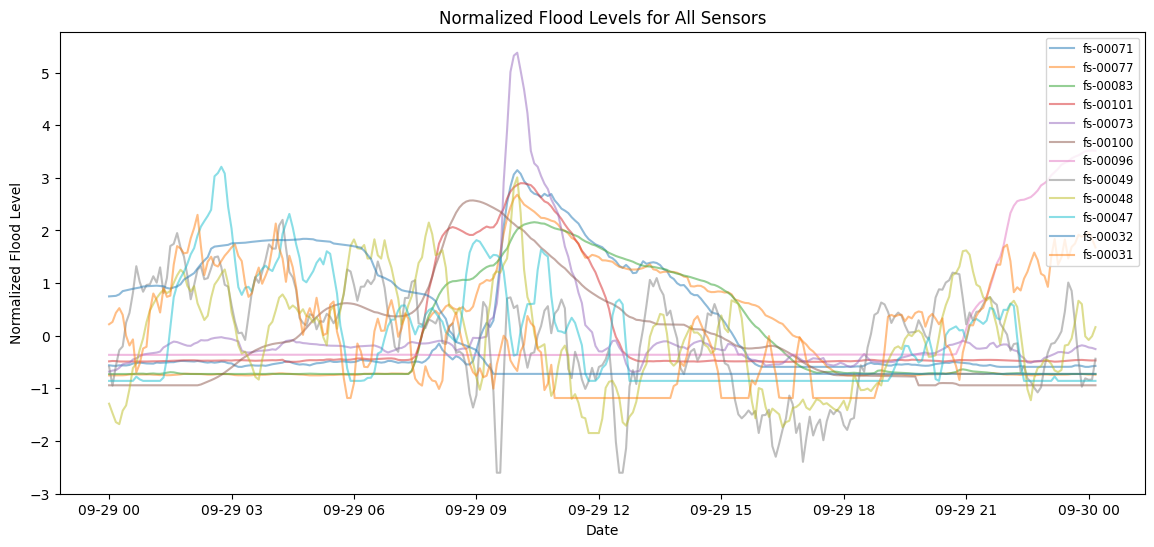

In [8]:

# Plotting normalized flood levels to observe initial patterns
plt.figure(figsize=(14, 6))
for sensor in sensor_columns:
    plt.plot(flood_data.index, flood_data[sensor], label=sensor, alpha=0.5)
plt.title("Normalized Flood Levels for All Sensors")
plt.xlabel("Date")
plt.ylabel("Normalized Flood Level")
plt.legend(loc='upper right', fontsize='small')
plt.show()

# Insight:
# - Visualizing flood levels across sensors helps observe variability and identify any obvious trends.
    

### Step 4: Clustering Analysis to Identify Safest vs. Flood-Prone Areas

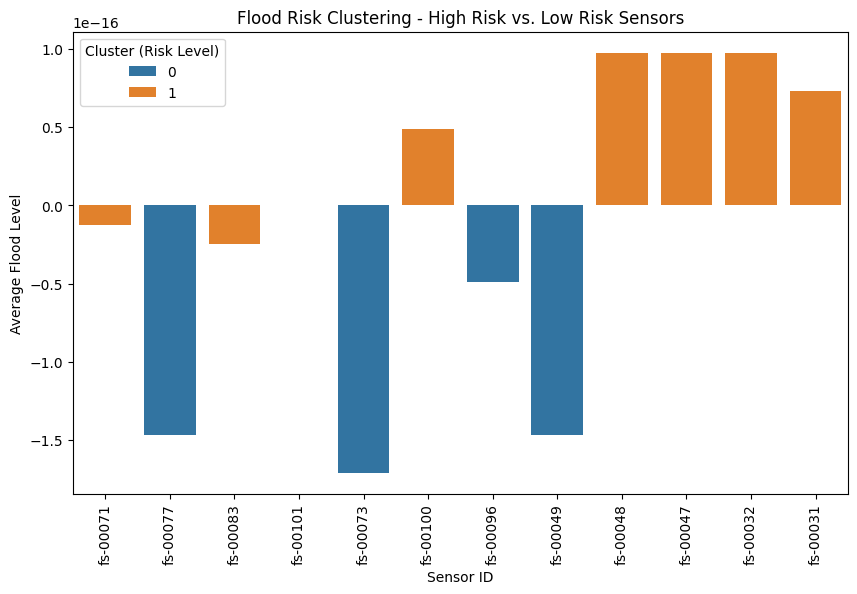

In [9]:

from sklearn.cluster import KMeans

# Calculate mean flood level per sensor as a feature for clustering
sensor_means = flood_data[sensor_columns].mean()

# Reshape data for KMeans clustering
sensor_data = np.array(sensor_means).reshape(-1, 1)

# Perform KMeans clustering to separate flood-prone vs. safer sensors
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(sensor_data)

# Assign cluster labels to sensors and plot
flood_risk = pd.DataFrame({'Sensor': sensor_means.index, 'Mean Flood Level': sensor_means.values, 'Cluster': clusters})

# Plot clusters to show high-risk vs low-risk areas
plt.figure(figsize=(10, 6))
sns.barplot(data=flood_risk, x='Sensor', y='Mean Flood Level', hue='Cluster', dodge=False)
plt.title("Flood Risk Clustering - High Risk vs. Low Risk Sensors")
plt.xlabel("Sensor ID")
plt.ylabel("Average Flood Level")
plt.xticks(rotation=90)
plt.legend(title="Cluster (Risk Level)")
plt.show()

# Explanation:
# - KMeans clustering separates sensors into two clusters representing high and low flood risks.
# - This visual highlights the safest and most flood-prone sensors based on average flood levels.
    

### Step 5: PCA for Dimensionality Reduction and Visualizing Patterns

In [10]:
# Check that clusters has the same length as the PCA data
if len(clusters) == len(flood_pca):
    # Plot PCA-transformed data with cluster colors
    plt.figure(figsize=(10, 6))
    plt.scatter(flood_pca[:, 0], flood_pca[:, 1], c=clusters, cmap='coolwarm', alpha=0.7)
    plt.title("PCA Projection of Sensor Data with Clustering")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster")
    plt.show()
else:
    print("Error: 'clusters' array length does not match 'flood_pca'.")


Error: 'clusters' array length does not match 'flood_pca'.


### Step 6: Temporal Clustering to Identify High and Low-Risk Periods

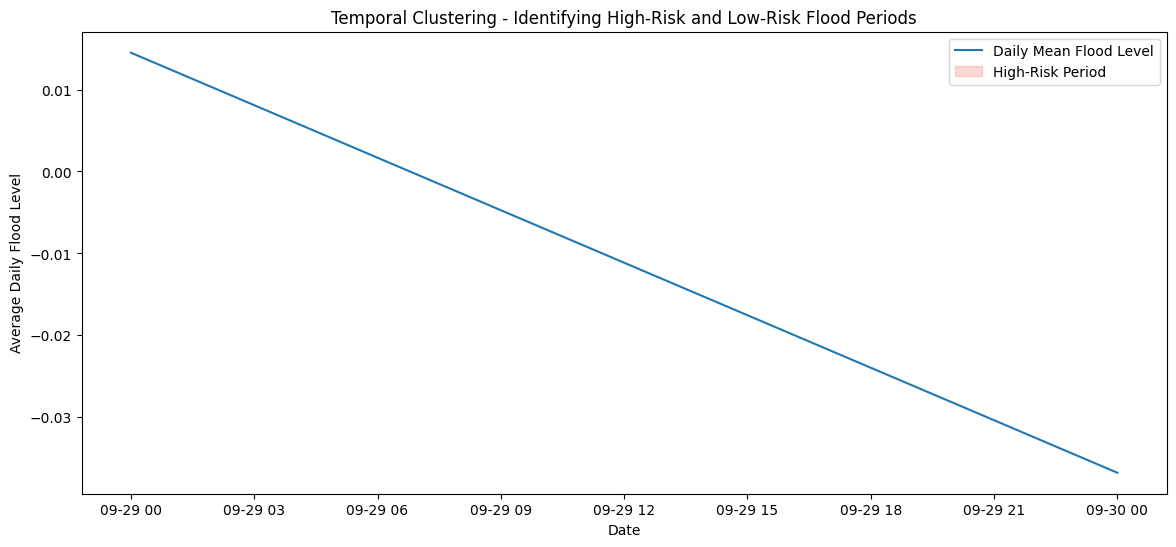

In [11]:

# Resample data to daily averages and calculate the mean flood level across sensors
daily_flood_levels = flood_data.resample('D').mean()
daily_mean_flood = daily_flood_levels.mean(axis=1)

# Clustering daily flood levels to detect high-risk and low-risk periods
daily_data = daily_mean_flood.values.reshape(-1, 1)
kmeans_time = KMeans(n_clusters=2, random_state=42)
time_clusters = kmeans_time.fit_predict(daily_data)

# Plotting clustered flood risk periods
plt.figure(figsize=(14, 6))
plt.plot(daily_mean_flood.index, daily_mean_flood, label="Daily Mean Flood Level")
plt.fill_between(daily_mean_flood.index, daily_mean_flood.min(), daily_mean_flood, 
                 where=(time_clusters==1), color='salmon', alpha=0.3, label="High-Risk Period")
plt.title("Temporal Clustering - Identifying High-Risk and Low-Risk Flood Periods")
plt.xlabel("Date")
plt.ylabel("Average Daily Flood Level")
plt.legend()
plt.show()

# Explanation:
# - Temporal clustering helps identify time periods with higher flood risks.
# - Visualizing clustered high-risk periods allows proactive planning and response.
    

### Step 7: Short-Term Flood Forecast Using Moving Average

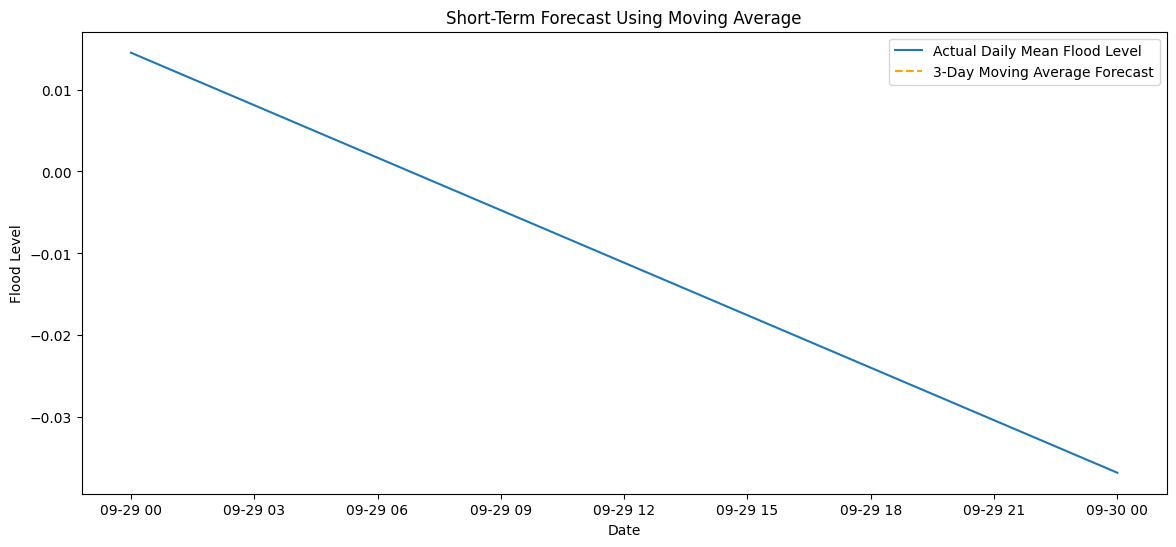

In [12]:

# Apply moving average to forecast short-term flood trends
window_size = 3
forecasted_trend = daily_mean_flood.rolling(window=window_size).mean().shift(-1)

# Plot actual vs forecasted trend
plt.figure(figsize=(14, 6))
plt.plot(daily_mean_flood.index, daily_mean_flood, label="Actual Daily Mean Flood Level")
plt.plot(forecasted_trend, label=f"{window_size}-Day Moving Average Forecast", linestyle='--', color='orange')
plt.title("Short-Term Forecast Using Moving Average")
plt.xlabel("Date")
plt.ylabel("Flood Level")
plt.legend()
plt.show()

# Explanation:
# - A moving average provides a simple forecast for short-term trends in flood levels.
# - This approach helps anticipate near-future flood risks in high-risk areas.
    

## Summary and Recommendations for Flood Preparedness


### Key Insights:
1. **Safest and Most Flood-Prone Areas**: Clustering analysis identifies which sensors consistently record lower flood levels, representing safer areas, and high-risk zones.
2. **High-Risk Time Periods**: Temporal clustering provides insights into timeframes with elevated flood risks.
3. **Short-Term Flood Forecasting**: Moving average trends offer a near-future prediction, supporting proactive flood preparedness.

### Future Work:
- **Integration with Environmental Data**: Future analyses could incorporate rainfall and tidal data to strengthen flood predictions.
- **Enhanced Forecasting Models**: Leveraging more sophisticated time-series models (e.g., ARIMA, LSTM) for improved long-term forecasting.

These insights support targeted flood management strategies, with actionable information for resource allocation in high-risk zones.
    